# E2a: Küchentischversuch zum Laval-Rotor

Name: Daniel Burgos  
Datum: 14.12.2023  

## Forschungsfrage

Wie lassen sich die Beschleunigungen eines sich bewegendes Objekts mithilfe eines Beschleunigungssensors aufnehmen? 
Sind die aufgenommenen Daten Aussagekräftig?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch1.jpeg" width="500">

- Beschreibung des Aufbaus:

Der Sensor ist über das Breadboard mit dem Raspberry Pi verbunden. Das Breadboard ist an der Waschmaschine befestigt. Um eine genauere Bewegungsübertragen der Bewegung der Waschmaschine an den Beschleunigungssensor zu gewährleisten, wurde das Braedboard so an dieser befestigt, dass dieses den Bewegungen der Waschmsachine möglichst bewegungstreu folgt.
- Vorgangsbeschreibung:

Zunächst wurden die zu verwendeten Metadaten hinterlegt, so dass diese beim Messvorgang verwendet und passend abgelegt werden, damit die Versuchsdaten eindeutig zuweisbar sind. Anschließend wird der Waschvorgang gestartet. Während des Schleuderprogramms der Waschmaschine wirdB der Messvorgang gestartet und die Messdaten aufgenommen. Nach Beendigung der Messung wird der Messaufbau abgebaut.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder =  "measurement_data/data_20231213_165641_DanielBurgos_washer" # replace None by the relative path to the first object's folder
h5_file_name = "data_20231213_165641_DanielBurgos_washer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231213_165641_DanielBurgos_washer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231213_165641_DanielBurgos_washer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231213_165641_DanielBurgos_washer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee99b42-6fcb-6082-8183-733e83da3d28": {
    "type": "probe",
    "name": "washer",
    "comment": "",
    "path": "measurement_data/da

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
uuid_sensor = sensor_settings_dict["ID"]
f = h5py.File((path_measurement_folder+"/"+h5_file_name),"r")
acc_x =np.array(f["RawData"][uuid_sensor]["acceleration_x"])
acc_y =np.array(f["RawData"][uuid_sensor]["acceleration_y"])
acc_z =np.array(f["RawData"][uuid_sensor]["acceleration_z"])
vec_time =np.array(f["RawData"][uuid_sensor]["timestamp"])
vec_time = vec_time - vec_time[0]


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
vec_accel = get_vec_accel(acc_x,acc_y,acc_z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


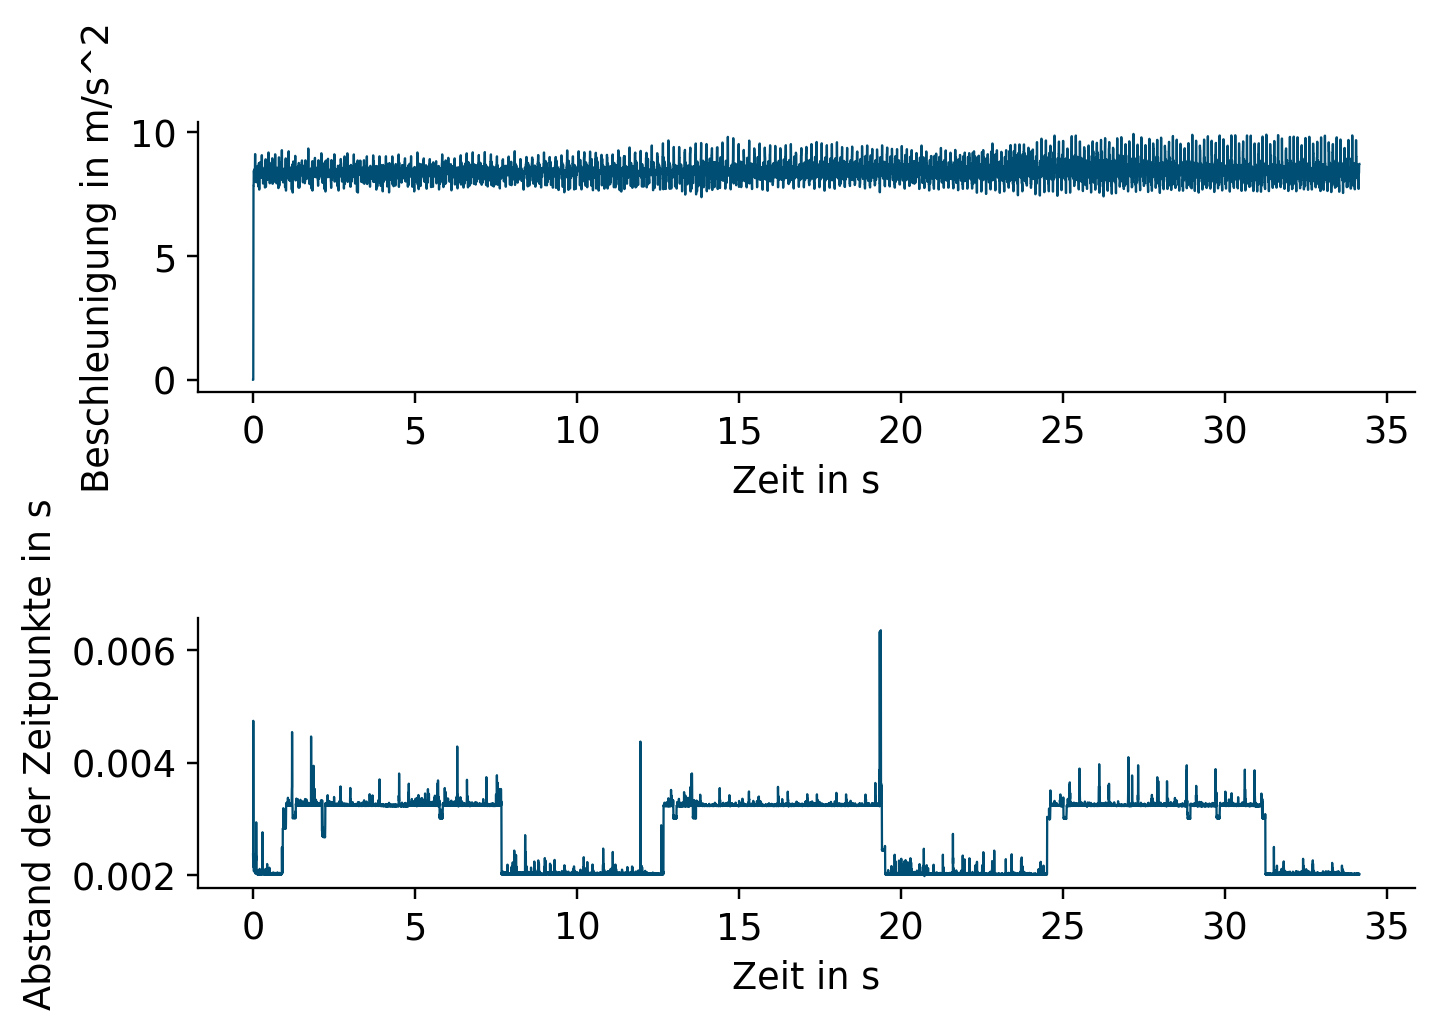

In [6]:
zeitabstände = np.diff(vec_time)
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(vec_time,vec_accel)
ax1.set_xlabel("Zeit in s")
ax1.set_ylabel("Beschleunigung in m/s^2")

ax2.plot(vec_time[0:-1],zeitabstände)
ax2.set_xlabel("Zeit in s")
ax2.set_ylabel("Abstand der Zeitpunkte in s")
plt.tight_layout()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
interpolated_data = interpolation(vec_time, vec_accel)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

Text(0, 0.5, 'Amplitude in |X(freq)|')

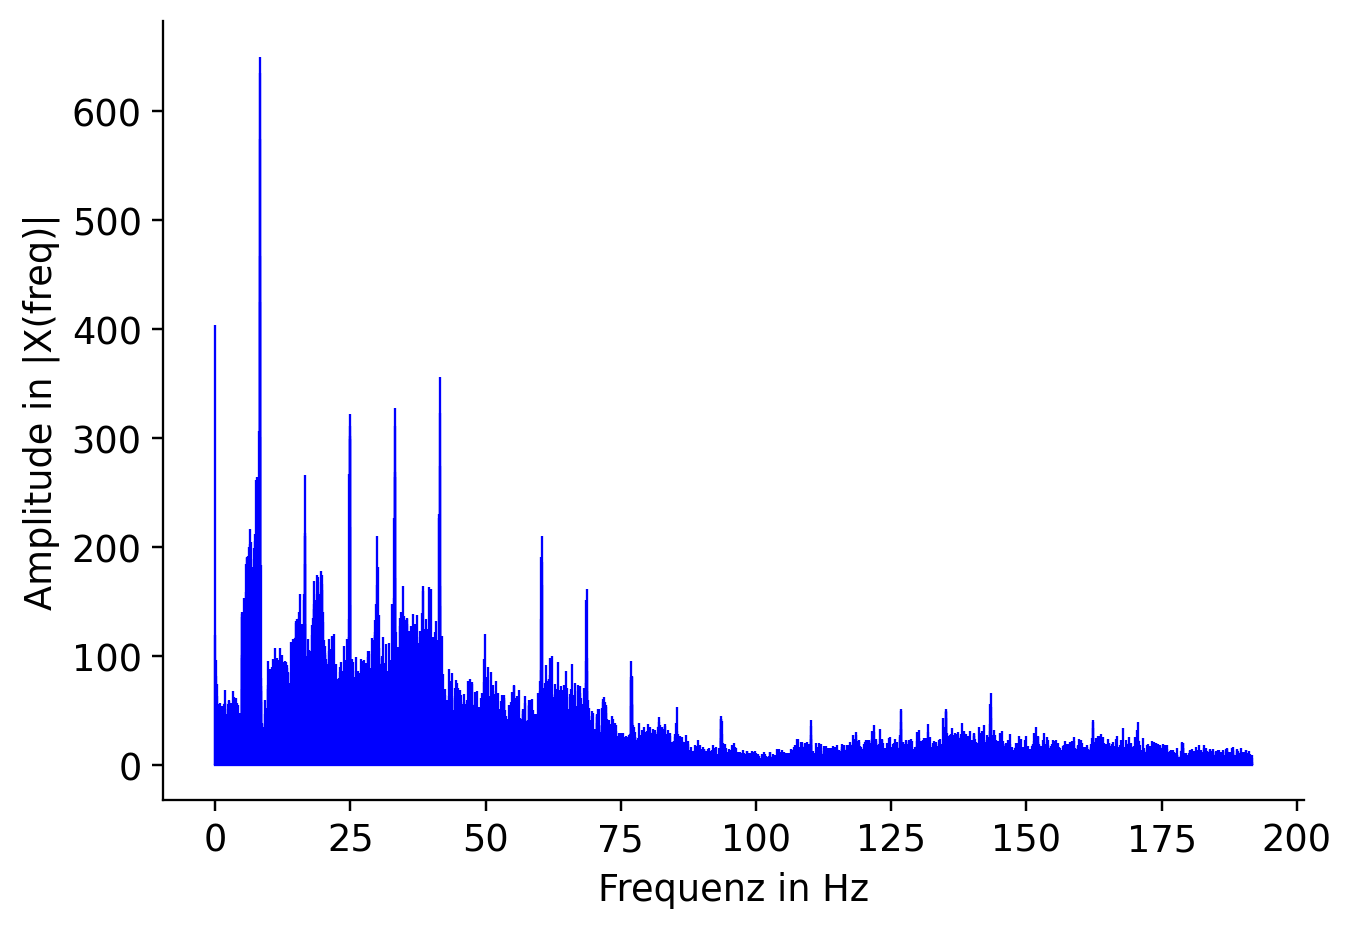

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
time = interpolated_data[0]
data = interpolated_data[1]

fft = my_fft(data,time)
plt.stem(fft[1], np.abs(fft[0]), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude in |X(freq)|")
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch2.jpeg" width="500">

- Beschreibung des Aufbaus:

Der Sensor ist über das Breadboard mit dem Raspberry Pi verbunden. Das Breadboard ist an dem Wäschetrockner befestigt. Um eine genaure Bewegungsübertragen vom Wäschetrockner an den Beschleunigungssensor zu gewährleisten, wurde das Breadboard so an diesem Befestigt, dasss dieses den Bewegungen der Waschmsachine möglichst bewegungstreu folgt.
- Vorgangsbeschreibung:

Zunächst wurden die zu verwendeten Metadaten hinterlegt ,so dass diese beim Messvorgang verwendet und passend abgelegt werden, damit die Versuchsdaten eindeutig zuweisbar sind. Anschließend wird der Trockenvorgang gestartet. Während des Trockenprogramms wird der Messvorgang gestartet und die Messdaten aufgenommen. Nach beednigung der Messung wird der Messaufbau abgebaut.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder =  "measurement_data/data_20231213_173649_DanielBurgos_dryer" # replace None by the relative path to the first object's folder
h5_file_name = "data_20231213_173649_DanielBurgos_dryer.h5" # replace None by the filename of the hdf5-file

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231213_173649_DanielBurgos_dryer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231213_173649_DanielBurgos_dryer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231213_173649_DanielBurgos_dryer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee99b47-6a35-6956-a664-7b121b8dfe4a": {
    "type": "probe",
    "name": "dryer",
    "comment": "",
    "path": "measurement_data/data_2

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
uuid_sensor = sensor_settings_dict["ID"]
f = h5py.File((path_measurement_folder+"/"+h5_file_name),"r")
acc_x =np.array(f["RawData"][uuid_sensor]["acceleration_x"])
acc_y =np.array(f["RawData"][uuid_sensor]["acceleration_y"])
acc_z =np.array(f["RawData"][uuid_sensor]["acceleration_z"])
vec_time =np.array(f["RawData"][uuid_sensor]["timestamp"])
vec_time = vec_time - vec_time[0]

#### 2. Betrag der Beschleunigung berechnen


In [11]:
vec_accel = get_vec_accel(acc_x,acc_y,acc_z)

#### 3. Darstellung der Messdaten

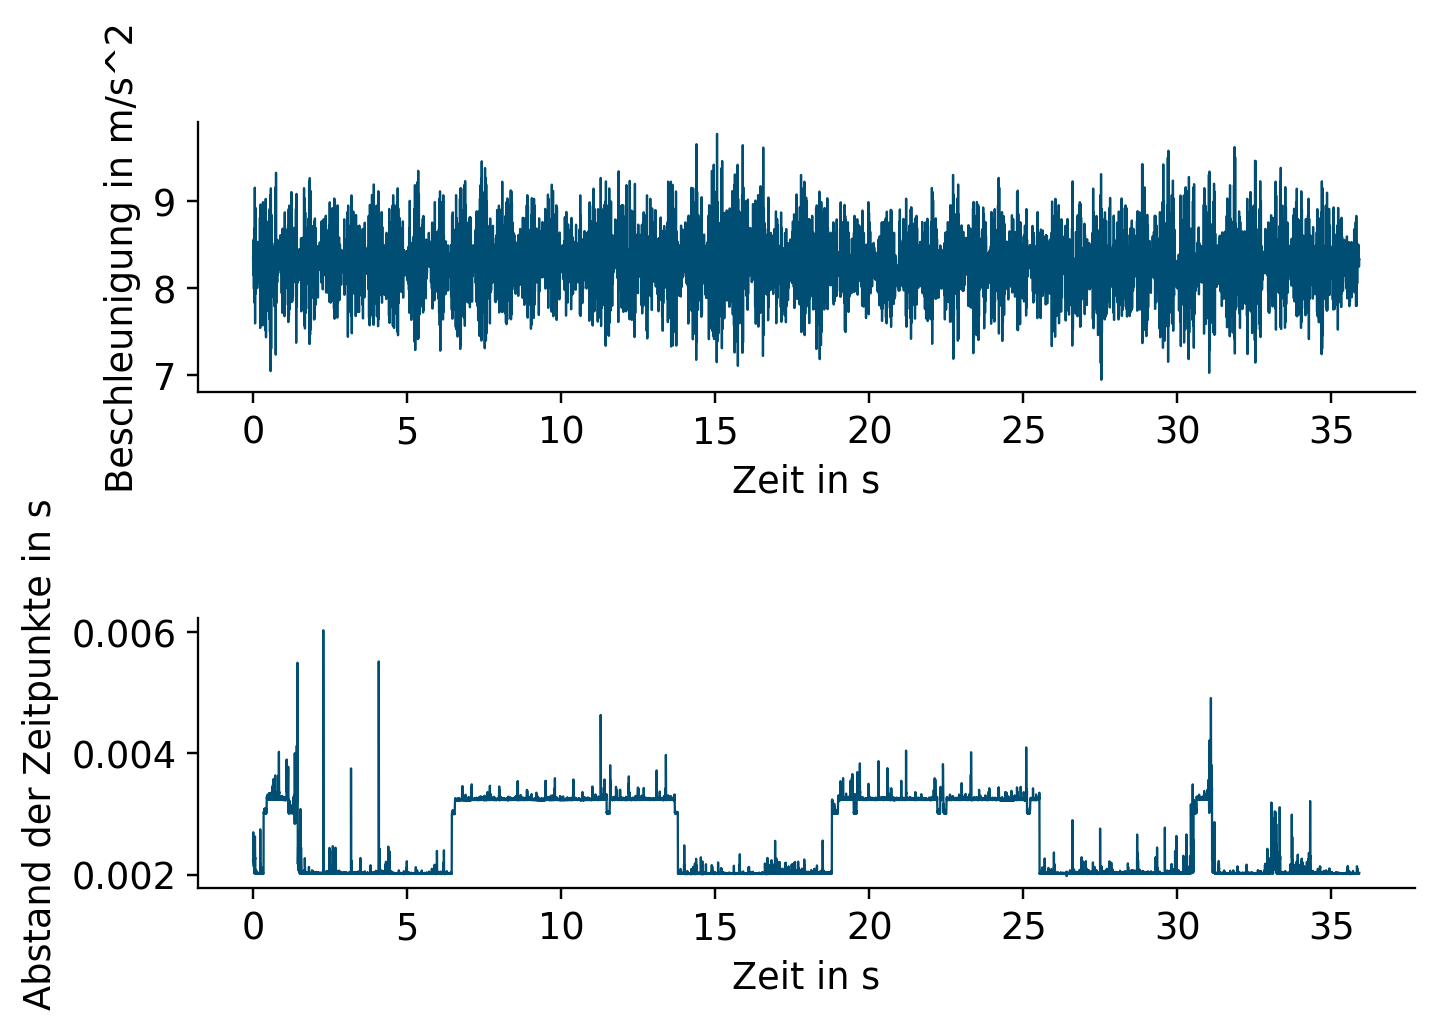

In [12]:
zeitabstände = np.diff(vec_time)
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(vec_time,vec_accel)
ax1.set_xlabel("Zeit in s")
ax1.set_ylabel("Beschleunigung in m/s^2")

ax2.plot(vec_time[0:-1],zeitabstände)
ax2.set_xlabel("Zeit in s")
ax2.set_ylabel("Abstand der Zeitpunkte in s")
plt.tight_layout()

#### 4. Interpolation der Messwerte



In [13]:
interpolated_data = interpolation(vec_time, vec_accel)

#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'Amplitude |X(freq)|')

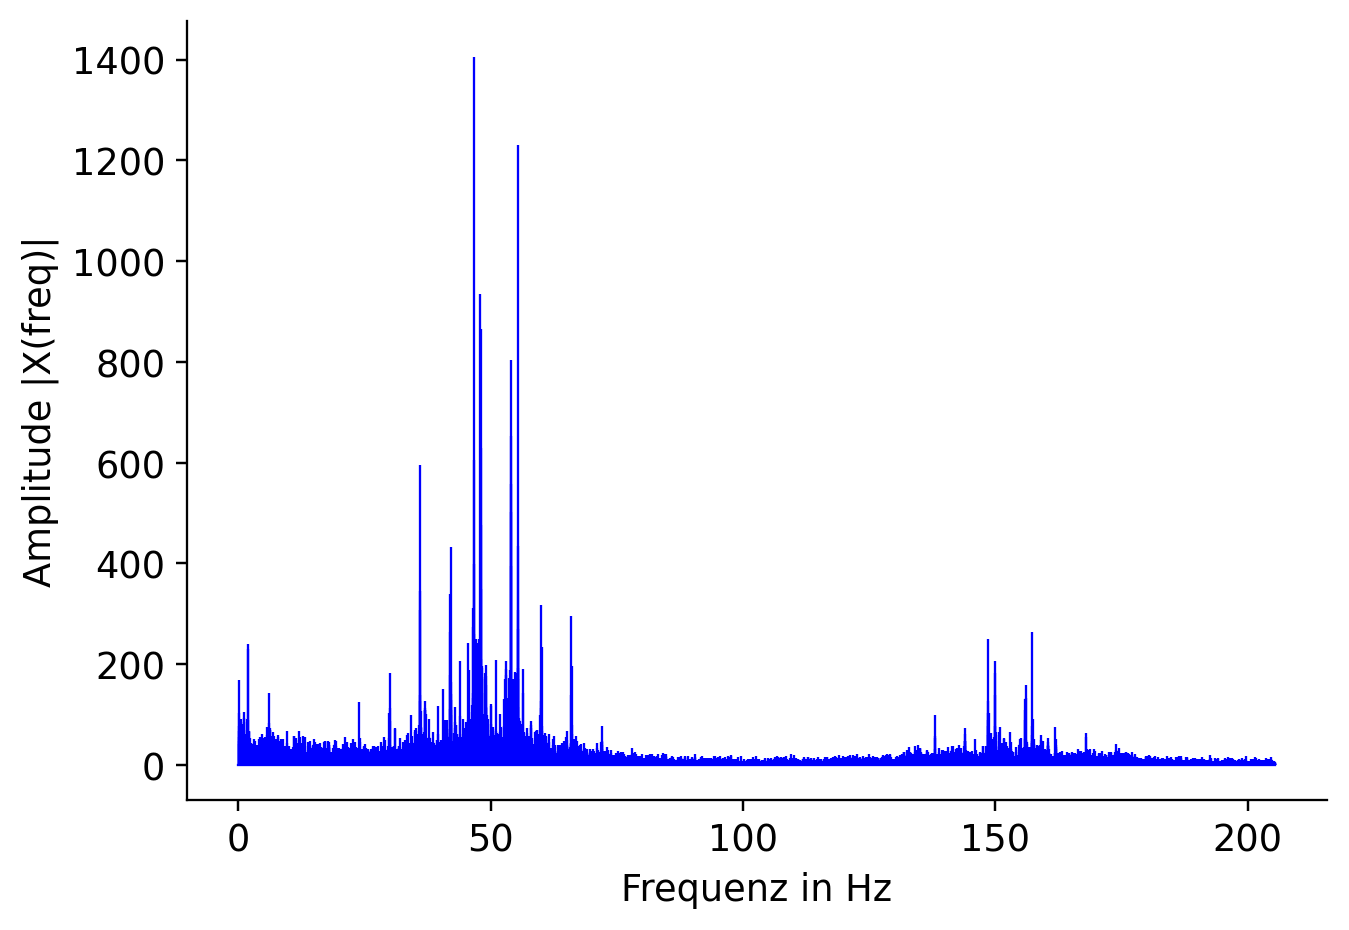

In [14]:
time = interpolated_data[0]
data = interpolated_data[1]

fft = my_fft(data,time)
plt.stem(fft[1], np.abs(fft[0]), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude |X(freq)|")

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Aus den aufgenommenen Messdaten lässt sich folgendes Ableiten:
Die aufgenommene Beschleunigung der Waschmaschine ist größer als die Beschleunigung des Wäschetrockners. Die Beschleinigung des Wäschetrockners ist zusätzlich breiter gestreut als die Beschleunigung der Waschmaschine. Die aufgenommenen Frequenzen der Beschleunigungen sind für die Waschmaschine im Durchschnitt niedriger und enger verteilt als bei den Daten des Wäschetrockners. Diese Erkentnisse lassen sich auch teilweise mit den Beobachtungen zusammenführen. Für das Schleudern ist die Umdrehungsgeschwindigkeit in der Waschmaschine höher als im Wäschetrockner. Auch die Vibrationen der Waschmaschine sind stärker als die Vibrationen des Wäschetrockners. Der große Teil der niedrigen Frequenzen der Waschmaschine lassen sich darauf zuruckführen, dass die Waschmaschine zwischen den Schleuderintervallen eine Pause einlegt um anschließend die Drehrichtung zu wechseln. 
Es lässt sich somit sagen, dass die Frequenzen und Beschleunigungen der vermessenen Vorgänge bestimmt werden können. Die Ergebnisse sind realistisch interpretierbar. Die Aussagekraft wird duch Reibkraftschlüssige Verbindungen des Sensors im Breadboard und der Adhäsion des Klebebands beeinflusst, da dadurch eine Bewegungstreue Messung erschwert werden könnte. Diese  Effekte sind allerdings beim vorliegenden Versuch zu vernachlässigen.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Die Arbeit mit dem Beschleunigungssensor war sehr interesannt. Die Programmierung des Messprogramms und die automatische Archivierung der Daten sind sicherlich in meinem zukünftigen Werdegang sehr hilfreich. Die Datenaufnahme war reibungslos. Es war interesant die Laplacetransformation in einem Programm anhand von Messdaten anwenden zu können. Die Implementierung der Laplacetransformation warfür mich allerdings nicht trivial.